# Testing different models on Afkhami's 

## Importing Data

In [22]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv("data.csv")
# Convert categorical data to numerical data using replace
df['Design'] = df['Design'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5})
df['Direction'] = df['Direction'].replace({'X': 0, 'Y': 1})

C:\Users\ab991130\AppData\Local\Temp\ipykernel_2288\1659394789.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Design'] = df['Design'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5})
C:\Users\ab991130\AppData\Local\Temp\ipykernel_2288\1659394789.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Direction'] = df['Direction'].replace({'X': 0, 'Y': 1})


## Preprocessing

In [24]:
y = df["Displacement"]
X = df.drop(columns = ["Displacement"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
X.shape

(108742, 4)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [26]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'accuracy'])
model.summary()

C:\Users\ab991130\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,961 (35.00 KB)

 Trainable params: 8,961 (35.00 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 1.2097e-04 - loss: 96.3270 - mae: 7.3906 - val_accuracy: 2.8737e-04 - val_loss: 36.5846 - val_mae: 4.4981
Epoch 2/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 5.9192e-05 - loss: 34.8634 - mae: 4.3382 - val_accuracy: 2.8737e-04 - val_loss: 31.4528 - val_mae: 4.0227
Epoch 3/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.3220e-04 - loss: 30.7879 - mae: 3.9554 - val_accuracy: 1.7242e-04 - val_loss: 28.9532 - val_mae: 3.8169
Epoch 4/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 5.9776e-05 - loss: 28.1722 - mae: 3.7099 - val_accuracy: 2.2990e-04 - val_loss: 27.3362 - val_mae: 3.5677
Epoch 5/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 9.9241e-05 - loss: 27.3509 - mae: 3.6211 - val_accuracy: 2.8737e-04 - val_loss: 28.1041 - val_mae: 3.6002
Epoch 6/100
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 5.6073e-05 - loss: 26.1888 - mae: 3.4881 - val_accuracy: 2.8737e-0

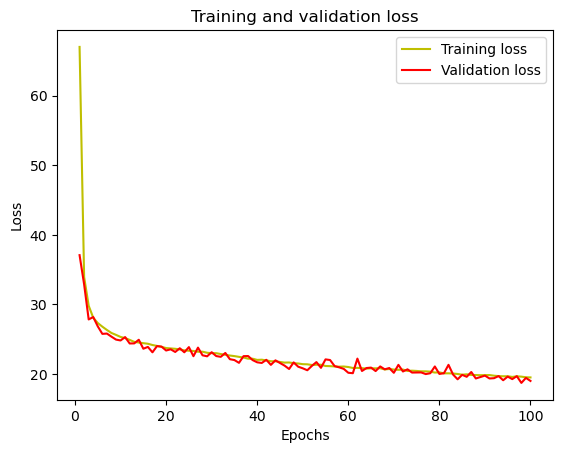

In [54]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


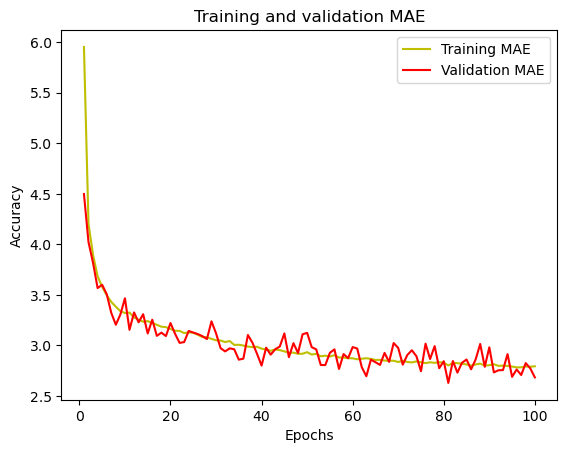

In [60]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [87]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted values are:  [[ -0.39874548]
 [-12.43592   ]
 [  0.0893088 ]
 [-13.304752  ]
 [-26.347746  ]]
Real values are:  93481     -0.001211
70677    -10.002947
66441     -0.001118
96387    -14.519304
107992   -26.759525
Name: Displacement, dtype: float64


In [88]:
model.evaluate(X, y)

3399/3399 ━━━━━━━━━━━━━━━━━━━━ 2s 663us/step - accuracy: 1.8429e-04 - loss: 64383.1953 - mae: 148.5904


[117240.6171875, 225.72618103027344, 0.0001563333353260532]

## Other models

In [31]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  83.30094230673464
Mean absolute error from linear regression:  7.137420784863814


In [32]:
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  29.031707451467312
Mean absolute error using decision tree:  2.53396988995152


In [33]:
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train_scaled, y_train)

y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

#Feature ranking...
import pandas as pd
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Mean squared error using Random Forest:  20.851140881333144
Mean absolute error Using Random Forest:  2.288099644679265
Force                0.825035
Design               0.132694
Direction            0.027036
Displacement Rate    0.015235
dtype: float64
